# **[FINAL PROJECT] - International Football Matches Dataset**

Source: [International football results from 1872 to 2023](https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017?select=results.csv)

---

# 1. Data Colecting

## 1.1 Overview

### Abstract
This dataset comprises 45,315 results of international football matches, ranging from the first official match in 1872 to 2023. It includes various tournaments such as the FIFA World Cup, FIFI Wild Cup, and regular friendly matches, focusing exclusively on men's full internationals.

### Background and Purpose
The dataset was compiled to create a comprehensive record of international football outcomes. The goal is to analyze historical trends, team performances, and tournament dynamics to derive insights into the evolution of the sport over time.

### Scope and Limitations
The dataset strictly covers men's full internationals and excludes data from the Olympic Games. Matches involving B-teams, U-23 teams, or league select teams are also omitted. While efforts have been made to ensure data accuracy, some limitations such as missing values and potential biases may exist.

## 1.2 Data Description

### Data Description

There're 3 tables in this dataset as below:
- `results.csv` includes the following columns:
    - `date` - date of the match
    - `home_team` - the name of the home team
    - `away_team` - the name of the away team
    - `home_score` - full-time home team score including extra time, not including penalty-shootouts
    - `away_score` - full-time away team score including extra time, not including penalty-shootouts
    - `tournament` - the name of the tournament
    - `city` - the name of the city/town/administrative unit where the match was played
    - `country` - the name of the country where the match was played
    - `neutral` - TRUE/FALSE column indicating whether the match was played at a neutral venue
- `shootouts.csv` includes the following columns:
    - `date` - date of the match
    - `home_team` - the name of the home team
    - `away_team` - the name of the away team
    - `winner` - winner of the penalty-shootout
- `goalscorers.csv` includes the following columns:
    - `date` - date of the match
    - `home_team` - the name of the home team
    - `away_team` - the name of the away team
    - `team` - name of the team scoring the goal
    - `scorer` - name of the player scoring the goal
    - `own_goal` - whether the goal was an own-goal
    - `penalty` - whether the goal was a penalty

### Relevance to Data Science Goals
This dataset is pivotal for understanding the historical context and performance metrics of international football. The insights derived will contribute to informed decision-making in the field of sports analytics.

### Unique Characteristics
Noteworthy features include standardized team and country names for consistency over time, allowing for easy tracking of team histories and statistics.

### Ethical Considerations
No sensitive information is included in the dataset. Privacy and ethical considerations have been prioritized throughout data collection and compilation.

# 2. Data Exploration

## 2.1 Loading data and dependencies

In [1]:
# import Lib
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from matplotlib.colors import ListedColormap


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Directory path where the CSV files are stored
data_path = '../data/'

# Get a list of all CSV files in the directory
file_names = [f.split('.')[0] for f in os.listdir(data_path) if f.endswith('.csv')]

data = {}
# Iterate through each file and append information to the list
for file_name in file_names:
    file_path = os.path.join(data_path, f'{file_name}.csv')
    data[file_name] = pd.read_csv(file_path)

## 2.2 Reviewing data

In [3]:
data['goalscorers'].head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [4]:
data['results'].head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
data['shootouts'].head()

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-07,South Korea,Iraq,Iraq
3,1972-05-17,Thailand,South Korea,South Korea
4,1972-05-19,Thailand,Cambodia,Thailand


## 2.3 How many rows and columns in dataset?

In [6]:
count_row_col = pd.DataFrame(index=data.keys(), data = {
    'Number Of Rows': [data[table].shape[0] for table in data.keys()],
    'Number Of Columns': [data[table].shape[1] for table in data.keys()]
})

count_row_col.add_suffix('.csv', axis=0).rename_axis('File names').reset_index()

,File names,Number Of Rows,Number Of Columns
0,goalscorers.csv,41008,8
1,shootouts.csv,547,4
2,results.csv,44353,9


## 2.4 Are there duplicated rows?

In [7]:
duplicated_data = pd.DataFrame(index=data.keys(), data = {
    'Number of Duplicated row': [data[table].duplicated().sum() for table in data.keys()],
})

duplicated_data.add_suffix('.csv', axis=0).rename_axis('File names').reset_index()

,File names,Number of Duplicated row
0,goalscorers.csv,81
1,shootouts.csv,0
2,results.csv,0


### 2.4.1 Removing dupplicated data

In [8]:
for table in data.keys():
	data[table] = data[table].drop_duplicates()

new_duplicated_data = pd.DataFrame(index=data.keys(), data = {
    'Number of Duplicated row': [data[table].duplicated().sum() for table in data.keys()],
})

new_duplicated_data.add_suffix('.csv', axis=0).rename_axis('File names').reset_index()

,File names,Number of Duplicated row
0,goalscorers.csv,0
1,shootouts.csv,0
2,results.csv,0


## 2.5 What is the current data type of each column? Are there columns having inappropriate data types?

In [9]:
data_types = {}
for table in data.keys():
	data_types[table] = data[table].dtypes.reset_index()
	data_types[table].columns = ['Column', 'Data Type']


In [10]:
data_types['goalscorers']

,Column,Data Type
0,date,object
1,home_team,object
2,away_team,object
3,team,object
4,scorer,object
5,minute,float64
6,own_goal,bool
7,penalty,bool


In [11]:
data_types['results']

,Column,Data Type
0,date,object
1,home_team,object
2,away_team,object
3,home_score,int64
4,away_score,int64
5,tournament,object
6,city,object
7,country,object
8,neutral,bool


In [12]:
data_types['shootouts']

,Column,Data Type
0,date,object
1,home_team,object
2,away_team,object
3,winner,object


**Conclude**: All the columns of each table have appropriated data type.

## 2.6 With each numerical column, how are values distributed?

### 2.6.1 Filtering all numerical column

In [13]:
# Select numerical columns
numerical_columns = {}
for table in data.keys():
	numerical_columns[table] = data[table].select_dtypes(include=['number']).columns

### 2.6.2 Statistic

In [14]:
numerical_columns_statistic = []

for table in data.keys():
	for col in numerical_columns[table]:
		df = data[table]
		numerical_columns_statistic.append([
			f'{table}.csv',
			col,
			df[df[col].isna()].shape[0]/df.shape[0]*100,
			df[col].min(),
			df[col].max()
		])

numerical_columns_statistic_df = pd.DataFrame(
	data = numerical_columns_statistic,
	columns = ['Filename', 'Column', 'Number of missing values', 'Min', 'Max']
)

numerical_columns_statistic_df

,Filename,Column,Number of missing values,Min,Max
0,goalscorers.csv,minute,0.454468,1.0,122.0
1,results.csv,home_score,0.000000,0.0,31.0
2,results.csv,away_score,0.000000,0.0,21.0


### 2.6.3 Visualization

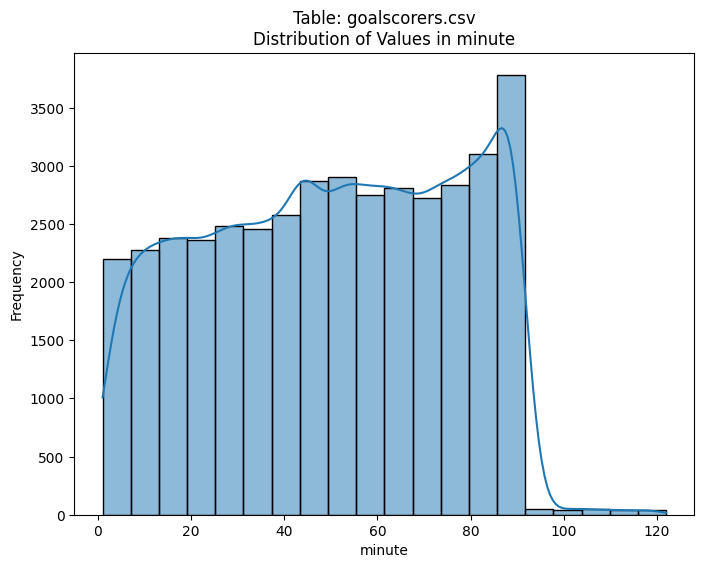

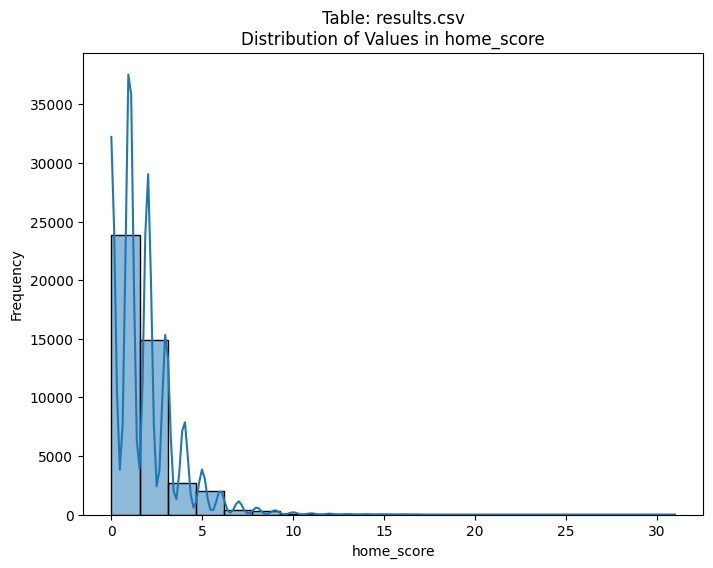

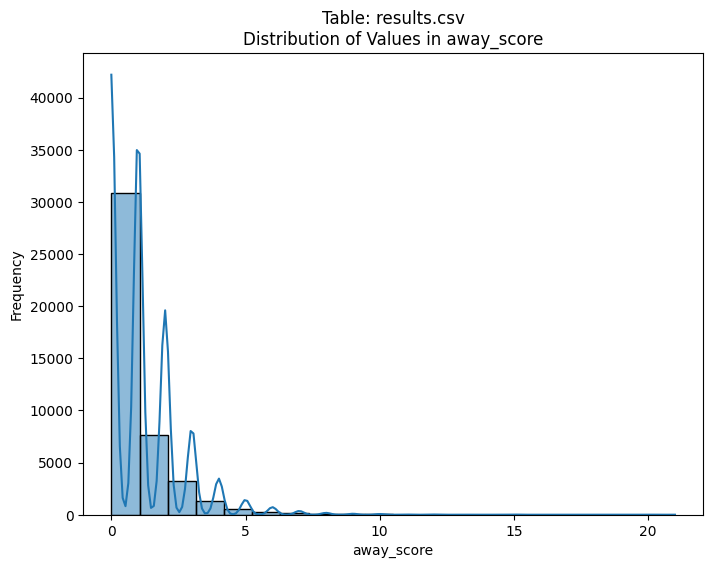

In [15]:
for table in data.keys():
    df = data[table]
   
    if(len(numerical_columns[table]) == 0): continue

    # Display basic statistics for numerical columns
    numeric_stats = df[numerical_columns[table]].describe()

    # Display histograms for each numerical column
    for column in numerical_columns[table]:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[column], bins=20, kde=True)
        plt.title(f'Table: {table}.csv\nDistribution of Values in {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

## 2.7 How does the categorical data distribute? 

### 2.7.1 Filtering all categorical columns

In [16]:
# Select numerical columns
categorical_columns = {}
for table in data.keys():
	categorical_columns[table] = data[table].select_dtypes(include=['object']).columns

### 2.7.2 Statistic

In [17]:
def categorical_statistic(table):
	categorical_columns_statistic = []

	for col in categorical_columns[table]:
		df = data[table]
		categorical_columns_statistic.append([
			col,
			df[col].isnull().sum()*100/len(df[col]),
			df[col].nunique()
		])

	return pd.DataFrame(
		data = categorical_columns_statistic,
		columns = ['Column', 'Missing ratio', 'Number of distinct values']
	)


In [18]:
categorical_statistic('results')

,Column,Missing ratio,Number of distinct values
0,date,0.0,15547
1,home_team,0.0,311
2,away_team,0.0,306
3,tournament,0.0,141
4,city,0.0,2010
5,country,0.0,267


In [19]:
categorical_statistic('goalscorers')

,Column,Missing ratio,Number of distinct values
0,date,0.00000,4323
1,home_team,0.00000,220
2,away_team,0.00000,220
3,team,0.00000,220
4,scorer,0.02932,13376


In [20]:
categorical_statistic('shootouts')

,Column,Missing ratio,Number of distinct values
0,date,0.0,485
1,home_team,0.0,162
2,away_team,0.0,172
3,winner,0.0,159


### 2.7.3 Visualization

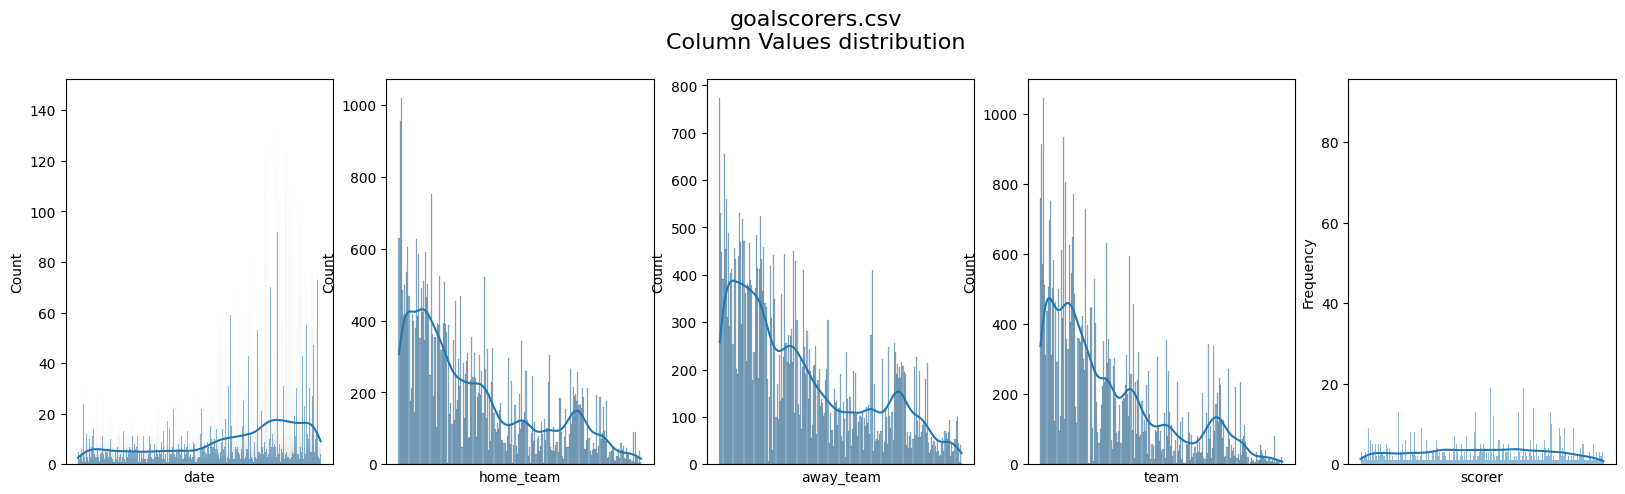

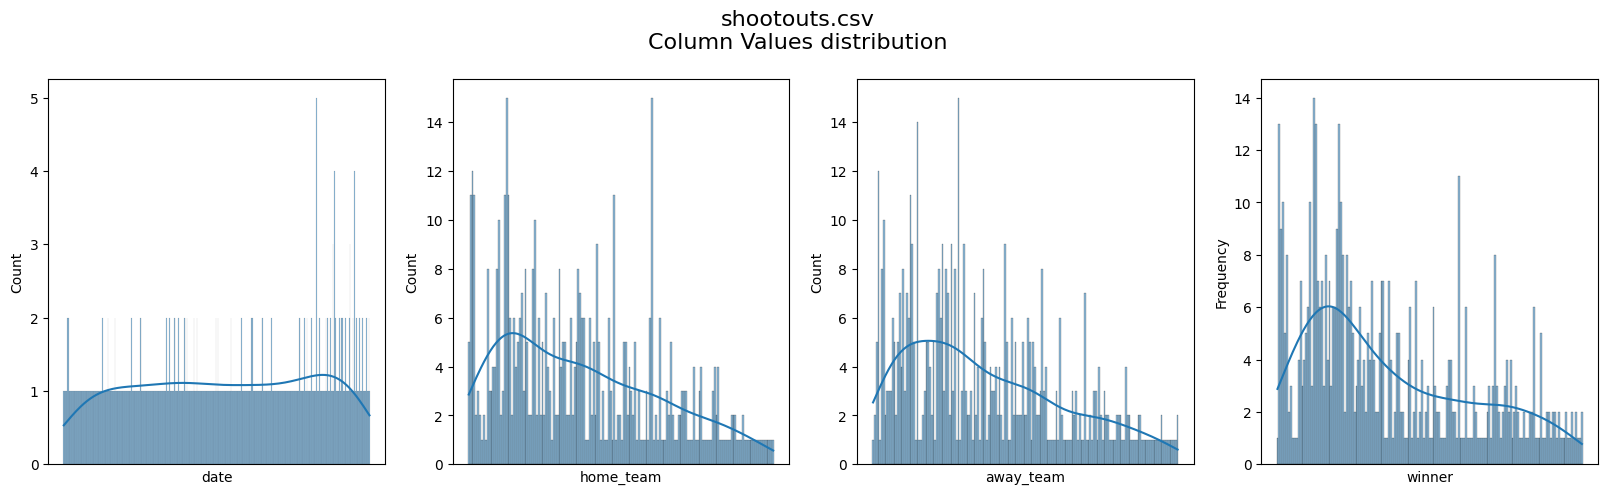

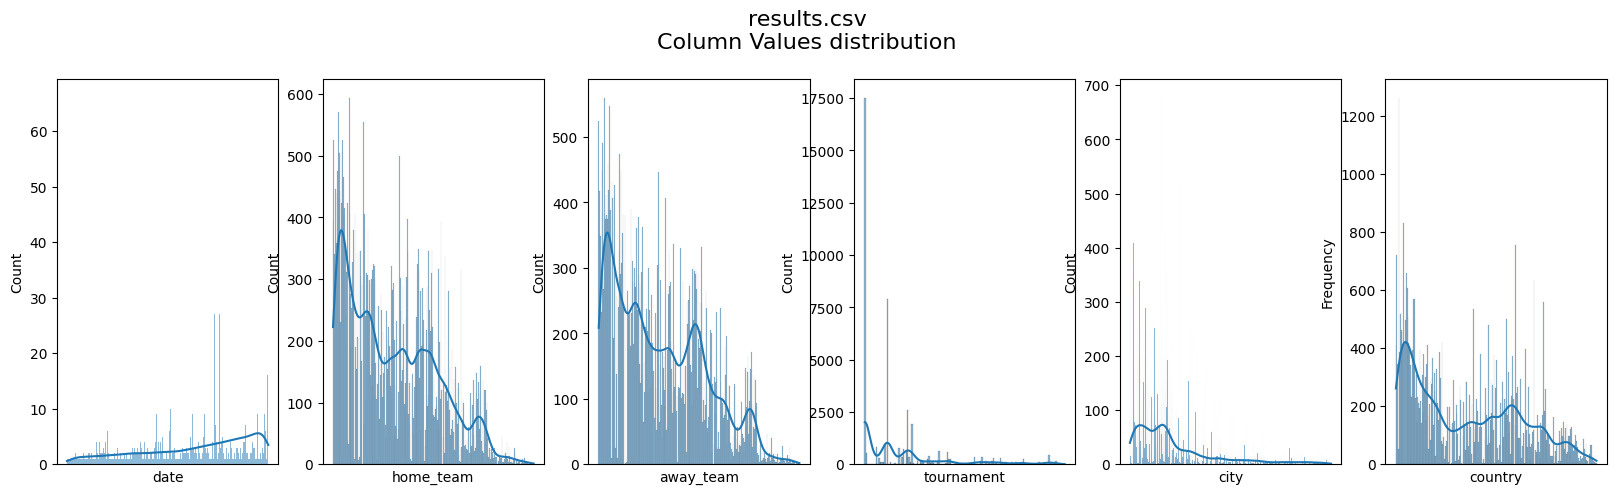

In [27]:
for table in data.keys():
    df = data[table]
    
    # Skip tables with no categorical columns
    if len(categorical_columns.get(table, [])) == 0:
        continue

    # Set up subplots
    num_cols = len(categorical_columns[table])
    fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(20, 5))
    
    # Display histograms for each categorical column
    for i, column in enumerate(categorical_columns[table]):
        sns.histplot(df[column], bins=20, kde=True, ax=axes[i])
        # axes[i].set_title(column)
        # axes[i].set_xlabel(column)
        # axes[i].set_ylabel('Frequency')
        axes[i].set_xticks([])  # Remove x-axis tick labels

    # Add super label with table name
    plt.ylabel("Frequency")
    plt.suptitle(f'{table}.csv\nColumn Values distribution', fontsize=16, y=1.02)

    plt.show()

# 3. Question

### I. Evolution of Football Across Time

#### [1. Understanding the Global Adoption of Football](#1-understanding-the-global-adoption-of-football)
- **Objective:** Gain insights into how football has been embraced globally over time, exploring its origins, and identifying top tournaments and teams on each continent.
- **Benefits:**
  - Obtain an overview of the factors contributing to the increasing popularity of football.
  - Explore the historical roots of football, tracing its origin and evolution.
  - Identify the prominent tournaments worldwide.
  - Examine the top ten teams from each continent for football enthusiasts.
- **Sub-Problems:**
    - [1.1 Analyze the approach of each country on every continent to football each decade, focusing on teams affiliated with their continental confederations.](#1.1-analyze-the-approach-of-each-country-on-every-continent)
    - [1.2 Determine the total number of matches for each tournament (excluding 'Friendly' matches) from 1870 to 2023.](#1.2-determine-the-total-number-of-matches-for-each-tournament)

# 4. Preprocessing

### Add column `team winner` to dataframe

To accurately address specific inquiries, it is essential to possess match outcome information indicating the winner. As a preliminary step before conducting data analysis, it is advisable to enhance the dataset by introducing a new column labeled `team_winner` to the `data['results']`. This column is designed to represent match results as follows:

-  If the home team emerges victorious, the `team_winner` value will be set to the home team.
-  If the away team prevails, the `team_winner` value will be assigned to the away team.
-  In the case of a drawn match, the `team_winner` value will be marked as `NaN`, denoting no explicit winner. This preprocessing step ensures that the dataset is equipped with essential information regarding match outcomes, facilitating subsequent analyses and responses to specific questions.

In [22]:
# Create 'team winner' column
df = data['results']
df['team_winner'] = np.where(df['home_score'] > df['away_score'],
                                       df['home_team'],
                                       np.where(df['home_score'] < df['away_score'],
                                                df['away_team'],
                                                np.nan))

# Calculate 'year' and 'decade' for each match
df['year'] = pd.to_datetime(df['date']).dt.year
df['decade'] = df['year'] - df['year'] % 10

In [23]:
for table in data.keys():
	data[table].reset_index(drop=True)

To facilitate effective data management and streamline analyses, it is necessary to merge two dataframes, namely `data['shootouts']` and `data['results']`. The merging process will be based on the common columns: `date`, `home_team`, and `away_team`. Following the merge, two distinct columns will denote the winner, with one indicating the winner during regular play and the other during penalty time. The objective is to combine these winner columns into a unified `team_winner` column, providing a comprehensive representation of the final match outcome. Additionally, it is essential to standardize team names by replacing historical variants with commonly recognized names.


In [24]:
# Merge the dataframes based on 'date', 'home_team', and 'away_team'
data['fullmatch'] = pd.merge(data["results"], data["shootouts"], how='left', on=['date', 'home_team', 'away_team'])

# Combine winner columns into 'team_winner'
data['fullmatch']['team_winner'] = data['fullmatch'].apply(lambda x: x['winner'] if pd.notnull(x['winner']) and pd.isnull(x['team_winner']) else x['team_winner'], axis=1)

# Drop the redundant 'winner' column
data['fullmatch'].drop(columns=['winner'], inplace=True)

# Replace historical team names with common names
teams_to_replace = {'Vietnam Republic': 'Vietnam', 'Yemen DPR': 'Yemen', 'German DR': 'Germany'}
data['fullmatch']['away_team'].replace(teams_to_replace, inplace=True)
data['fullmatch']['home_team'].replace(teams_to_replace, inplace=True)

# Display the resulting dataframe
data['fullmatch']

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,team_winner,year,decade
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN,1872,1870
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,1873,1870
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,1874,1870
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN,1875,1870
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,1876,1870
...,...,...,...,...,...,...,...,...,...,...,...,...
44348,2022-12-14,Thailand,Taiwan,0,1,Friendly,Pathum Thani,Thailand,False,Taiwan,2022,2020
44349,2022-12-14,Vietnam,Philippines,1,0,Friendly,Hanoi,Vietnam,False,Vietnam,2022,2020
44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,Al Rayyan,Qatar,True,Croatia,2022,2020
44351,2022-12-17,Singapore,Maldives,3,1,Friendly,Singapore,Singapore,False,Singapore,2022,2020


# 5. Data analyzing to answer questions

### I. Evolution of Football Across Continents Over a Century

Over the span of a century, football has evolved into a universally recognized and beloved sport. This overview aims to explore the global adoption of football throughout the years.

#### 1. Analyzing Continent-wise Football Development

To gain insights into how each country on every continent embraced football, we will focus on teams affiliated with their respective continental confederations. The process involves the following steps:

- **Data Splitting:**
  - Split the `data['fullmatch']` dataframe into six lists, each corresponding to a specific continent. The number of members in each continent will be compared based on information available in this Wikipedia [link](https://en.wikipedia.org/wiki/List_of_football_federations).

- **Creating Confederation and Region Dataframe:**
  - Develop a dataframe named `data['fullmatch']` with three essential columns: `Team`, `Confederation`, and `Region`. This dataframe will serve as a repository for teams belonging to each confederation along with their respective regions.

- **Team Decade Identification:**
  - Construct a `Team_df` dataframe, encompassing all countries from `data['fullmatch']`. This dataframe will include information about each country's first decade of involvement in football.

- **Visualization Support:**
  - Merge `Team_df` with `data['fullmatch']` to enhance our ability to visualize and analyze the geographical and confederation-based aspects of football development.

This comprehensive analysis will shed light on the diverse paths taken by countries on different continents as they embraced and contributed to the global legacy of football.


In this section, to find the confederation of each teams:
- Finding `tournament` have acronym of 6 confederation or the most popular for this confederation.

In [25]:
continents = {
	"AFC": data['results'][(data['results']['tournament'].str.contains('AFC',case=False)) & (data['results']["tournament"].str.contains("NAFC") == False)],
	"CAF": data['results'][data['results']['tournament'].str.contains('African ',case=False) & (data['results']["tournament"].str.contains("West") == False)],
	"UEFA": data['results'][data['results']['tournament'].str.contains('UEFA',case=False) & (data['results']["tournament"].str.contains("CONMEBOL") == False)],
	"CONCACAF": data['results'][data['results']['tournament'].str.contains('CONCACAF',case=False)],
	"CONMEBOL": ['Argentina' ,'Bolivia' ,'Brazil' ,'Chile' ,'Colombia' ,'Ecuador' ,'Paraguay' ,'Peru' ,'Uruguay','Venezuela'],
	"OFC": ['American Samoa' ,'Cook Islands' ,'Fiji' ,'Kiribati' ,'New Caledonia' ,'New Zealand' ,' Niue' ,'Papua New Guinea' ,'Samoa','Solomon Islands','Tahiti','Tonga','Tuvalu','Vanuatu']
}

exclude_teams_caf = ['Guadeloupe', 'French Guiana', 'New Caledonia', 'Mayotte', 'Tahiti', 'Saint Pierre and Miquelon']

for country in exclude_teams_caf:
	continents["CAF"] = continents["CAF"][continents["CAF"]['away_team'] != country ]

for cont in continents:
	if not isinstance(continents[cont], list):
		continents[cont] = list(continents[cont]['away_team'])

AFC = continents["AFC"]
CAF = continents["CAF"]
UEFA = continents["UEFA"]
CONCACAF = continents["CONCACAF"]
CONMEBOL = continents["CONMEBOL"]
OFC = continents["OFC"]

Countries_df = pd.DataFrame({
    'Team': AFC + CAF  + CONCACAF + CONMEBOL + OFC + UEFA,
    'Confederation' : ['AFC'] * len(AFC) + ['CAF'] * len(CAF) + ['CONCACAF'] * len(CONCACAF) + ['CONMEBOL'] * len(CONMEBOL) + ['OFC'] * len(OFC) + ['UEFA'] * len(UEFA),
    'Region' : ['Asia'] * len(AFC) + ['Africa'] * len(CAF) + ['North and Central America'] * len(CONCACAF) + ['South America'] * len(CONMEBOL) + ['Oceania'] * len(OFC) + ['Europe'] * len(UEFA),
})

# List all teams in `data['fullmatch']` dataframe from both home team and away team.
# Make sure that there are no duplicated teams in this list.
Teams=list(data['fullmatch']['home_team'].unique()) + list(data['fullmatch']['away_team'].unique())
Teams_df=pd.DataFrame({'Team': list(set(Teams))})

# Caculate the first year and decade of each team when they have the first match 
Teams_df['First year']=Teams_df['Team'].apply(lambda x : data['fullmatch'][(data['fullmatch']['home_team']==x) | (data['fullmatch']['away_team']==x)]['year'].values[0])
Teams_df['First decade']=Teams_df['First year']-Teams_df['First year']%10

# Merge two dataframe by 'Team' column then sort by first year columns.
Teams_df=Teams_df.merge(Countries_df,how='left',on=['Team'])
Teams_df.sort_values(by='First year',inplace=True)
new_teams_decade_region_df= Teams_df.groupby(['First decade','Region']).size().unstack('Region')

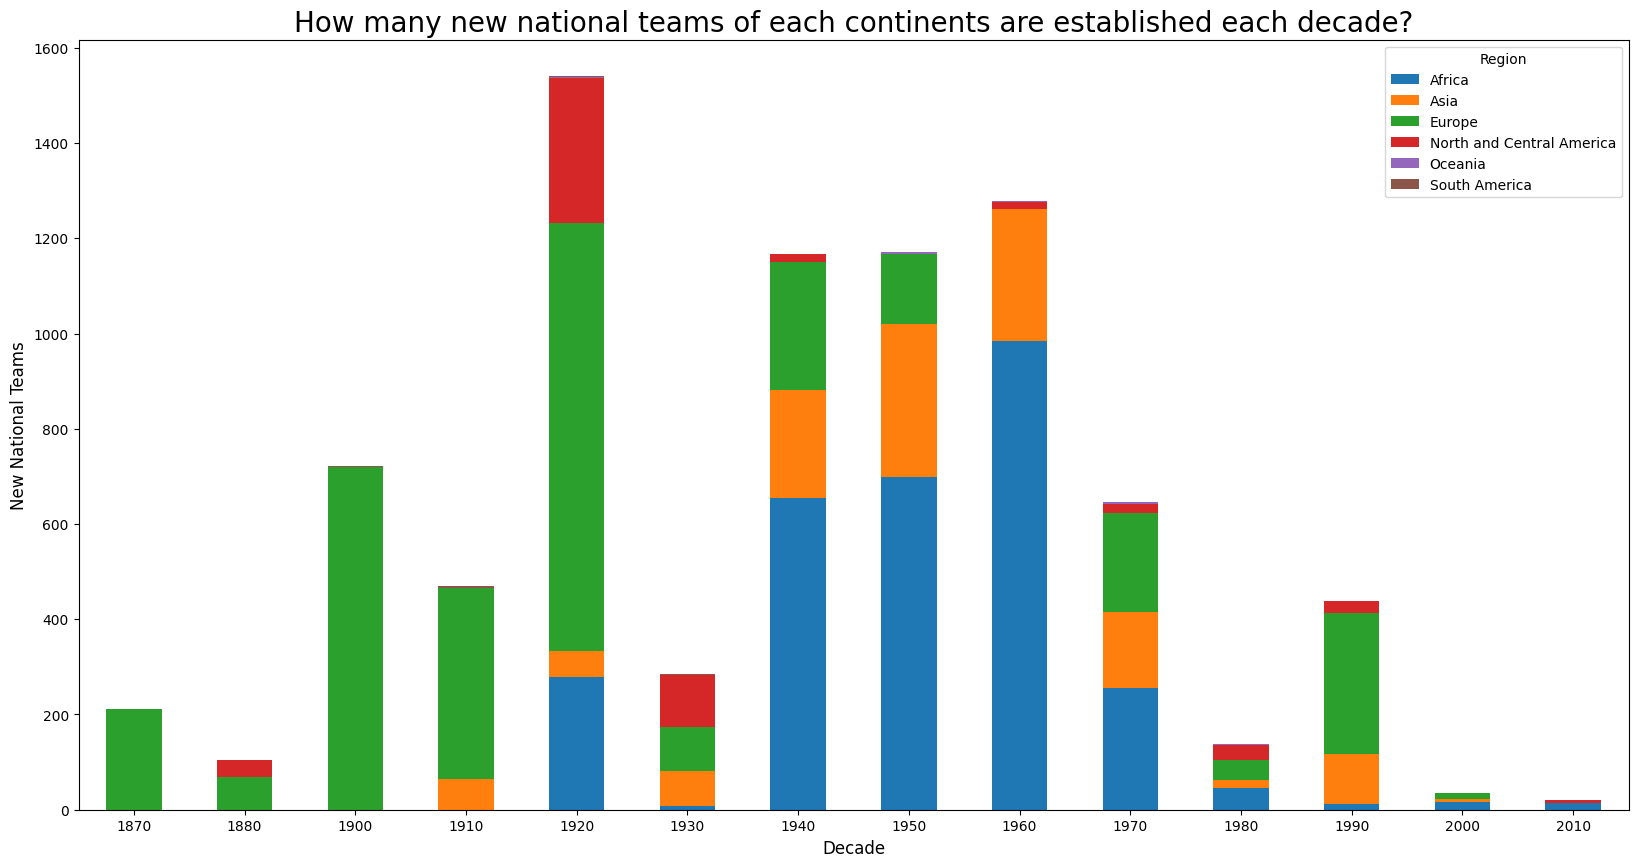

In [26]:
ax = new_teams_decade_region_df.plot(kind='bar', stacked=True, figsize=(20,10));
ax.set_title('How many new national teams of each continents are established each decade?', size=20)
ax.set_xlabel(xlabel='Decade', size=12)
ax.set_ylabel(ylabel='New National Teams', size=12)
plt.xticks(rotation=0);

### Evolution of Football Across Continents:

The historical development of football reveals significant milestones across continents:

1. **Europe's Pioneering Era (1870):**
   - Europe stands as the cradle of football, initiating the sport in 1870.
   - Over the subsequent five decades, numerous European countries enthusiastically embraced football, solidifying the continent's role as the birthplace of the sport.

2. **North and Central America's Emergence (1920):**
   - Following Europe, North and Central America embraced football, marking a notable expansion of the sport.
   - The first teams from this continent actively participated in football around 1920, contributing to the global growth of the game.

3. **South America and Asia Join the Game (1910):**
   - In 1910, both South America and Asia joined the football phenomenon, adding their unique flair to the sport's global narrative.
   - The inclusion of new teams from these continents showcased the increasing internationalization of football.

4. **Global Spread Between 1920 and 1970:**
   - A significant surge in football's popularity occurred between 1920 and 1970.
   - During this period, a multitude of countries from various continents initiated their football journey, contributing to the widespread adoption of the sport worldwide.

This historical timeline underscores Europe's pioneering influence, followed by the sequential adoption of football across North and Central America, South America, and Asia. The period between 1920 and 1970 emerges as a pivotal era when football became a truly global phenomenon.


# 6. References:
- Data source: https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017?select=results.csv